In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn as sk

In [2]:
df = pd.read_csv('creditcard.csv')

# EDA

## Analysis of the shape of the data

**Identification of the target data**

In [3]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

Here our target data is the `Class` column. We will use this column to train our model.

**Number of rows and columns**

In [4]:
df.columns.value_counts().sum()

31

In [5]:
df.count()[0]

284807

There are 284807 rows and 31 columns in our dataset.

**Types of variables**

In [6]:
df.dtypes.value_counts()

float64    30
int64       1
dtype: int64

We have 2 types of variables in our dataset: float64(30) and int64(1).

The only integer variable is the `Class` column.

**Missing values**

In [7]:
df.isna().sum().sum()

0

There are no missing values in our dataset.

## Deep data analysis

**Target visualization**

We will now visualize the target data to see if it is balanced or not.

The target data is a binary variable.

<AxesSubplot:ylabel='Class'>

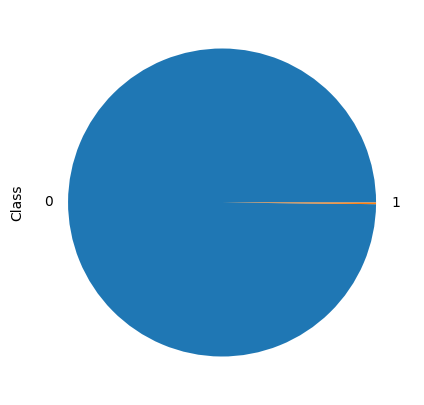

In [8]:
# plot the counts as a pie chart
df['Class'].value_counts().plot(kind='pie', figsize=(5, 5))

Our target data contains 2 values: 0 and 1.

* 0: Normal transaction

* 1: Fraudulent transaction

The histogram above shows us that our dataset is unbalanced. We have a lot more normal transactions than fraudulent transactions. There are 492 fraudulent transactions and 284315 normal transactions.

In [9]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

To solve this problem, we will take a sample of the normal transactions to have a balanced dataset.

In [10]:
df = df.sample(frac=1,random_state=42)

fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:492]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

new_df = normal_distributed_df.sample(frac=1,random_state=42)

<AxesSubplot:ylabel='Class'>

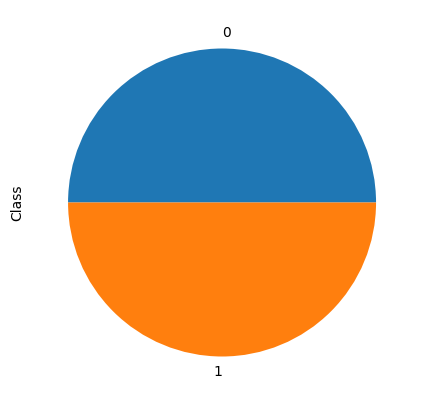

In [11]:
new_df['Class'].value_counts().plot(kind='pie', figsize=(5, 5))

Our dataset is now perfectly balanced.

But there is one default with this method, we have a lot less data to train our model. So our model could be less accurate.

## Understanding the input data

As we saw earlier, our dataset contains 30 input variables. There are 3 types of input variables: ``Time``, ``Amount`` and ``V1`` to ``V28``.

* ``Time``: This variable contains the time elapsed between each transaction and the first transaction in the dataset. This variable is in seconds.

* ``Amount``: This variable contains the amount of the transaction.

* ``V1`` to ``V28``: These variables are the result of a PCA Dimensionality reduction to protect user identities and sensitive features.

Since the last 28 variables are the result of a PCA, we will not be able to interpret them. So we will only interpret the first 2 variables.

**Time**

In [12]:
new_df['Time'].describe()

count       984.000000
mean      87065.849593
std       47647.280998
min         406.000000
25%       45531.000000
50%       78893.500000
75%      133784.250000
max      171766.000000
Name: Time, dtype: float64

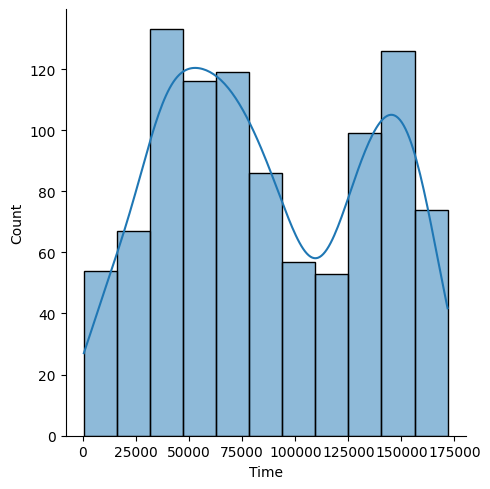

In [13]:
sns.displot(x=new_df['Time'],kde=True)

We notice that the ``Time`` variable is not normalized. So we will have to normalize it.

We can also plot the distribution of the ``Time`` for each class.

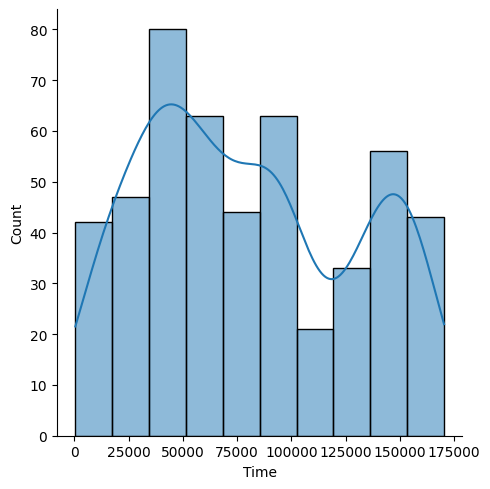

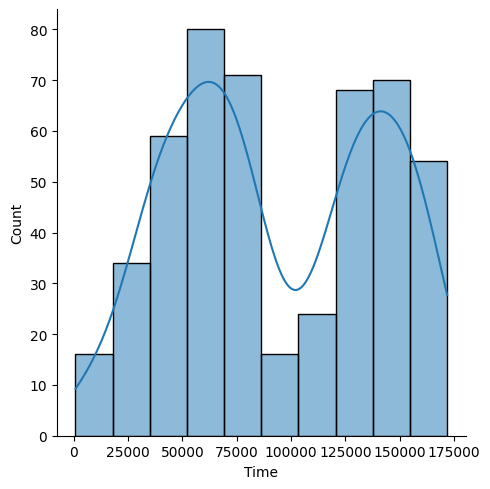

In [14]:
sns.displot(new_df[new_df['Class'] == 1]['Time'],kde=True)
sns.displot(new_df[new_df['Class'] == 0]['Time'],kde=True)

The distribution of the ``Time`` for each class is almost the same. So this variable might not be very useful for our model. We will make sure of that later with the correlation matrix.

**Amount**

In [15]:
new_df['Amount'].describe()

count     984.000000
mean      105.424431
std       255.930293
min         0.000000
25%         1.000000
50%        16.455000
75%        99.990000
max      3502.110000
Name: Amount, dtype: float64

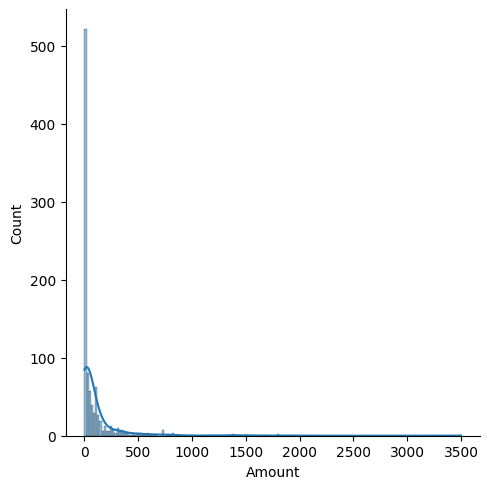

In [16]:
sns.displot(x=new_df['Amount'],kde=True)

In this variable, there are a lot of small transactions and a few large transactions.

The average transaction amount is 106.725020

The maximum transaction amount is 2276.32

There again, we will have to normalize this variable.

Like for the ``Time`` variable, we can plot the distribution of the Amount for each class.

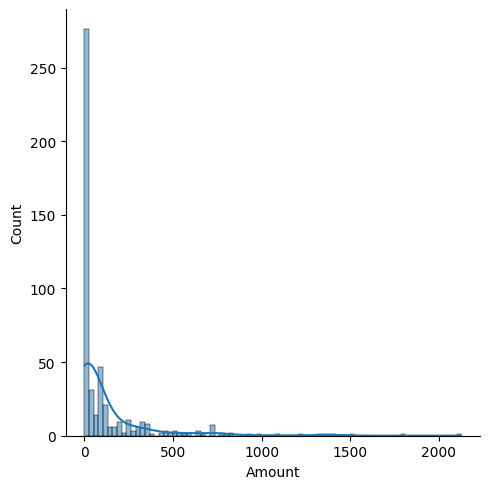

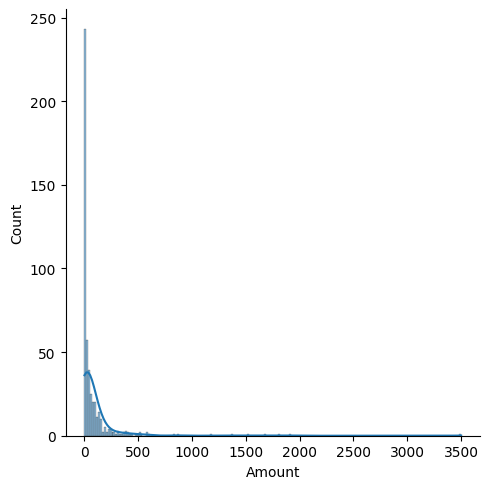

In [17]:
sns.displot(new_df[new_df['Class'] == 1]['Amount'],kde=True)
sns.displot(new_df[new_df['Class'] == 0]['Amount'],kde=True)

The distribution of the ``Amount`` for each class is almost the same. So this variable might not be very useful for our model.

**V_k**

To understand the relation between the input variables and the target variable, we will plot the correlation matrix.

<AxesSubplot:>

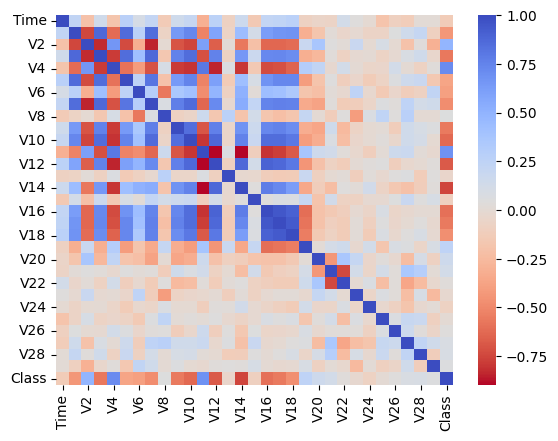

In [18]:
corr = new_df.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20})

To make it easier to read, we will plot the correlation matrix with a clustermap. This will group the variables with a high correlation together.

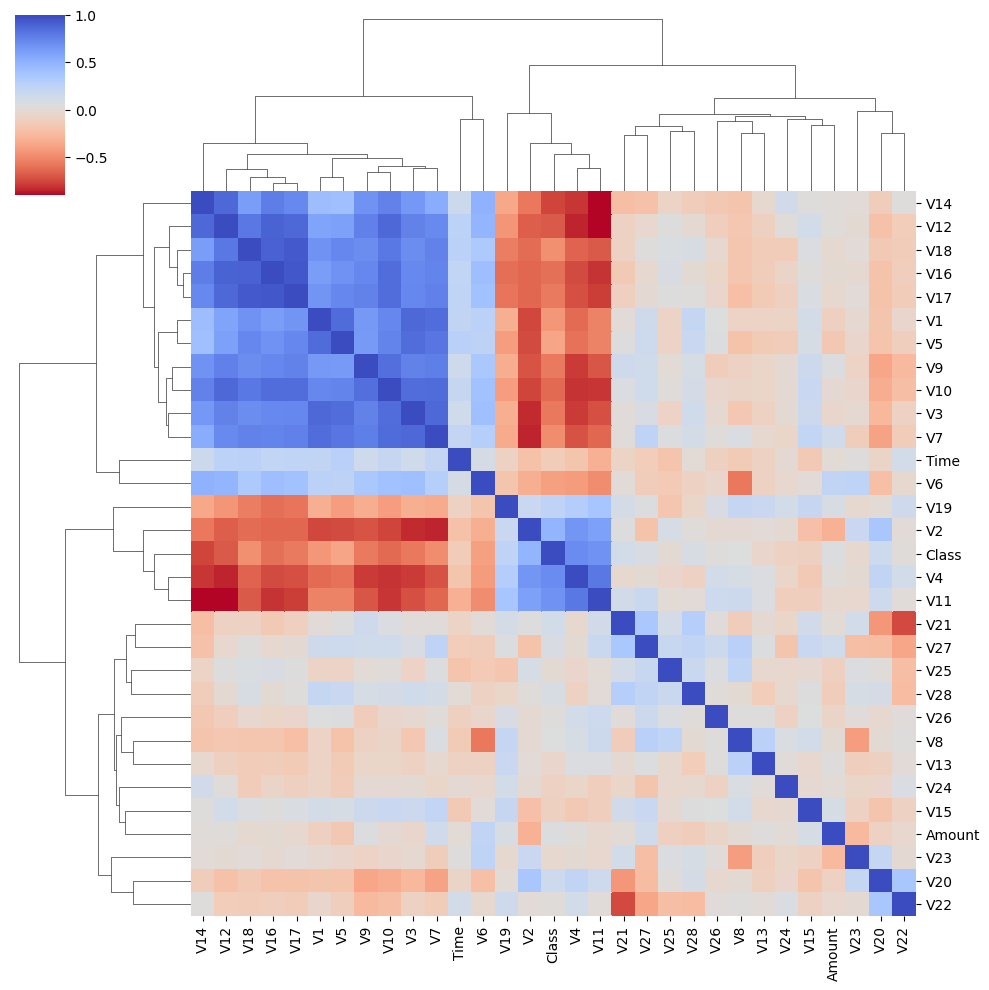

In [19]:
sns.clustermap(corr, cmap='coolwarm_r', annot_kws={'size':20})

This correlation matrix shows us that the variables ``V2``, ``V4``, ``V11`` and ``V19`` are the most correlated with the target variable.

And the variables ``V16``, ``V14``, ``V12`` and ``V10`` are negatively correlated with the target variable.

We can plot the distribution of these variables for each class.

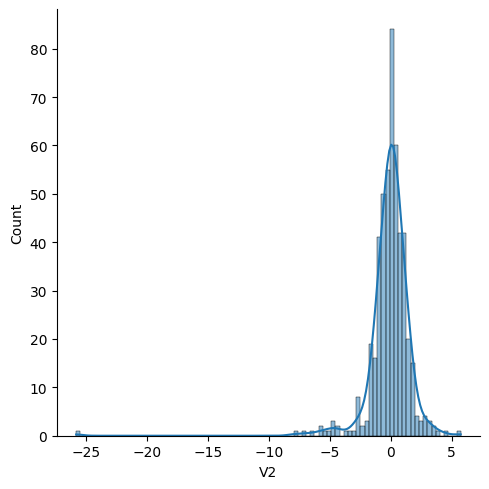

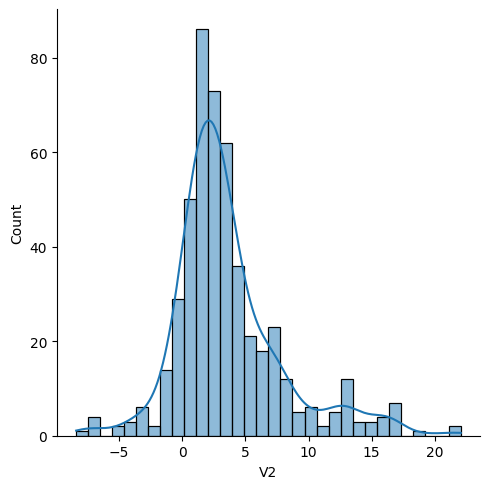

In [20]:
sns.displot(new_df[new_df['Class']==0]['V2'],kde=True)
sns.displot(new_df[new_df['Class']==1]['V2'],kde=True)

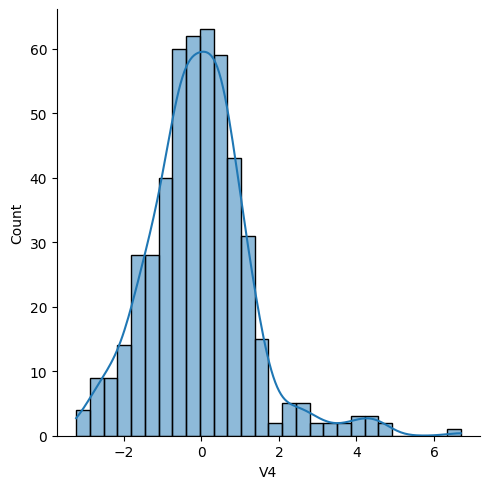

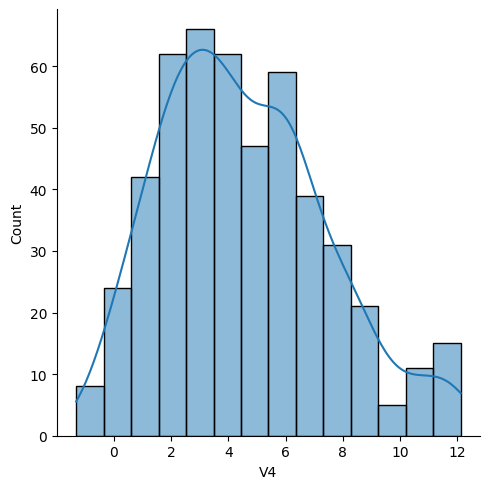

In [21]:
sns.displot(new_df[new_df['Class']==0]['V4'],kde=True)
sns.displot(new_df[new_df['Class']==1]['V4'],kde=True)

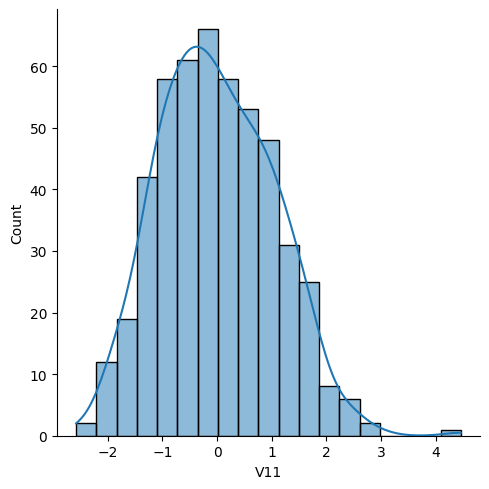

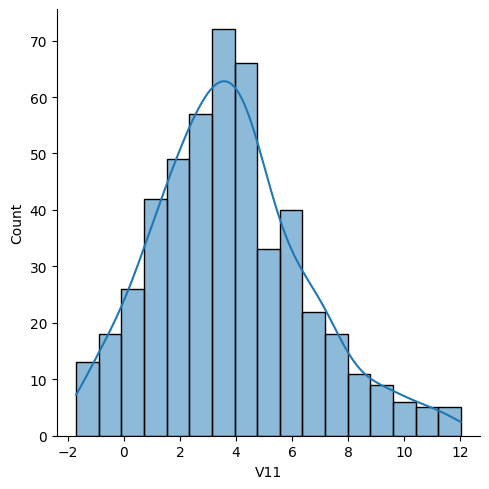

In [22]:
sns.displot(new_df[new_df['Class']==0]['V11'],kde=True)
sns.displot(new_df[new_df['Class']==1]['V11'],kde=True)

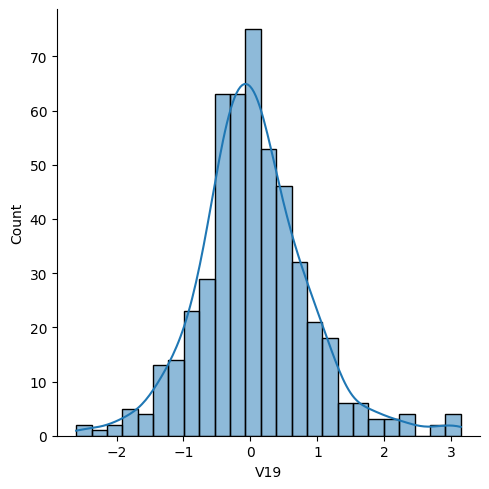

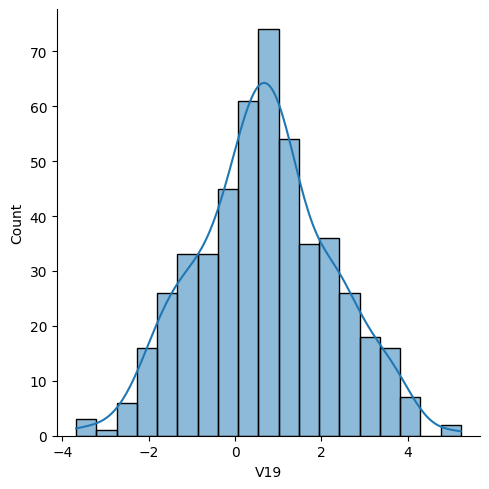

In [23]:
sns.displot(new_df[new_df['Class']==0]['V19'],kde=True)
sns.displot(new_df[new_df['Class']==1]['V19'],kde=True)

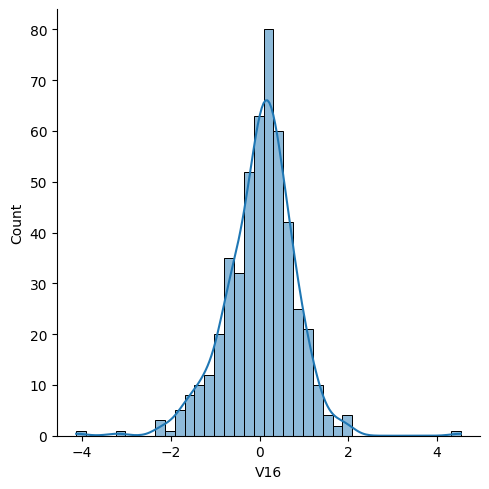

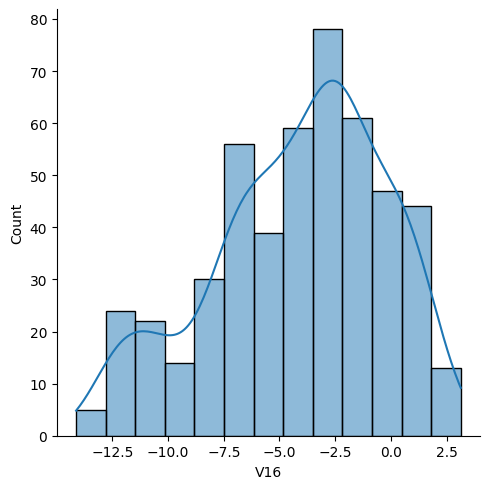

In [24]:
sns.displot(new_df[new_df['Class']==0]['V16'],kde=True)
sns.displot(new_df[new_df['Class']==1]['V16'],kde=True)

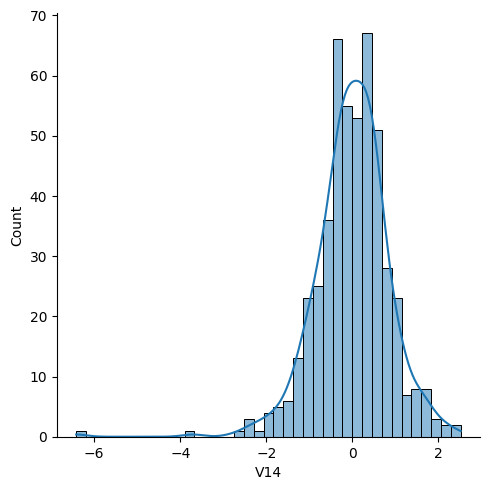

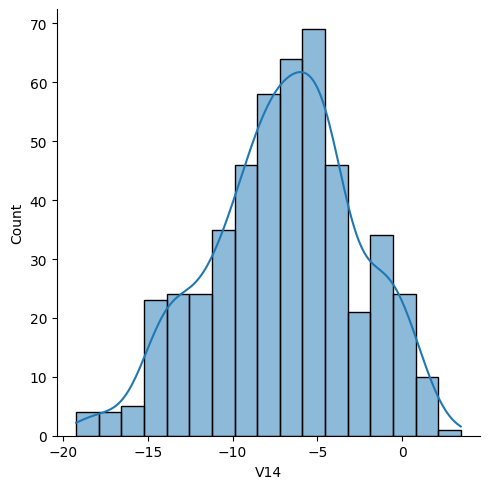

In [25]:
sns.displot(new_df[new_df['Class']==0]['V14'],kde=True)
sns.displot(new_df[new_df['Class']==1]['V14'],kde=True)

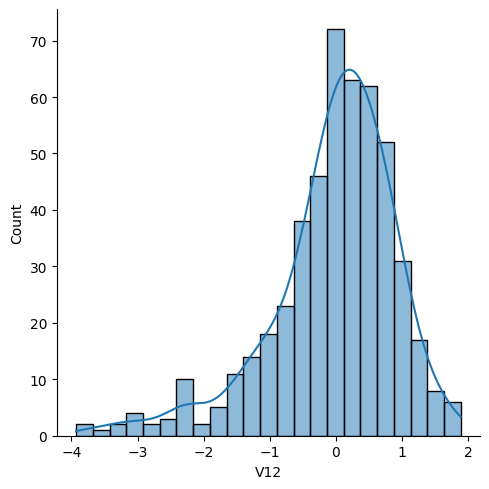

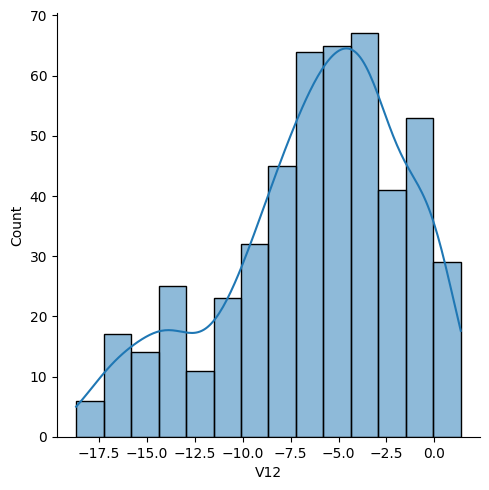

In [26]:
sns.displot(new_df[new_df['Class']==0]['V12'],kde=True)
sns.displot(new_df[new_df['Class']==1]['V12'],kde=True)

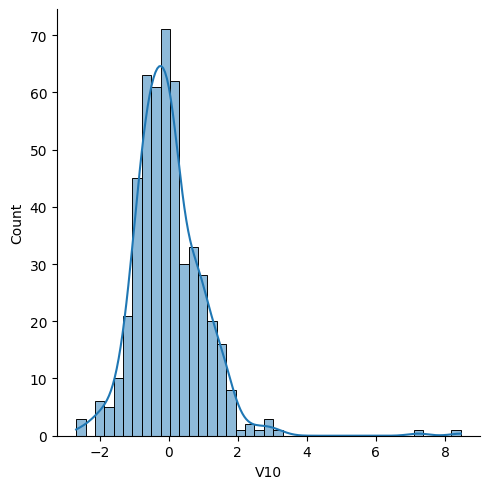

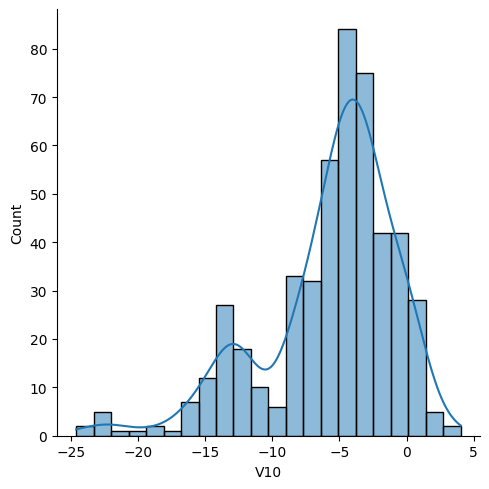

In [27]:
sns.displot(new_df[new_df['Class']==0]['V10'],kde=True)
sns.displot(new_df[new_df['Class']==1]['V10'],kde=True)

We notice a difference in the distribution of these variables for each class. So these variables could be useful for our model.

To verify this, we have to make a statistical test. We will use the Student test.

Let's formulate our hypothesis:

* $H_0$: The average value of the variable Vk for the normal transactions is equal to the average value of the variable Vk for the fraudulent transactions.

* $H_1$: The average value of the variable Vk for the normal transactions is different from the average value of the variable Vk for the fraudulent transactions.

In [28]:
from scipy.stats import ttest_ind

In [29]:
normal_df = new_df[new_df['Class']==0]
fraud_df = new_df[new_df['Class']==1]

In [30]:
def t_test(df1,df2,col):
    alpha = 0.05
    stat, p = ttest_ind(df1[col],df2[col])
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    if p > alpha:
        print('Same distributions (fail to reject H0)')
    else:
        print('Different distributions (reject H0)')

In [31]:
cols = ['V2','V4','V11','V19','V16','V14','V12','V10']
for col in cols:
    print(col)
    t_test(normal_df,fraud_df,col)
    print()

V2
Statistics=-17.631, p=0.000
Different distributions (reject H0)

V4
Statistics=-32.310, p=0.000
Different distributions (reject H0)

V11
Statistics=-29.339, p=0.000
Different distributions (reject H0)

V19
Statistics=-8.013, p=0.000
Different distributions (reject H0)

V16
Statistics=23.422, p=0.000
Different distributions (reject H0)

V14
Statistics=35.389, p=0.000
Different distributions (reject H0)

V12
Statistics=29.037, p=0.000
Different distributions (reject H0)

V10
Statistics=25.180, p=0.000
Different distributions (reject H0)



For each of the variables, we obtain a p-value less than 0.05. So we can reject the null hypothesis $H_0$.

## Conclusion of the EDA

We have seen that the variables ``V2``, ``V4``, ``V11`` and ``V19`` are the most correlated with the target variable.

And the variables ``V16``, ``V14``, ``V12`` and ``V10`` are negatively correlated with the target variable.

So, to train our model, we will use these variables and the variable ``Time`` and ``Amount``.

Moreover, we will normalize the variables ``Time`` and ``Amount``.

In [39]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [36]:
new_df['Time_Normalized'] = StandardScaler().fit_transform(new_df['Time'].values.reshape(-1,1))
new_df['Amount_Normalized'] = StandardScaler().fit_transform(new_df['Amount'].values.reshape(-1,1))
new_df.drop(['Time','Amount'],axis=1,inplace=True)

In [37]:
new_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,Time_Normalized,Amount_Normalized
146884,2.054361,-0.122642,-1.245717,0.189567,0.132497,-0.620765,0.059581,-0.148058,0.338940,0.247959,...,-0.687048,0.271569,-0.497120,-0.270115,0.208619,-0.076075,-0.075428,0,0.018377,-0.408266
95597,-2.923827,1.524837,-3.018758,3.289291,-5.755542,2.218276,-0.509995,-3.569444,-1.016592,-4.320536,...,-0.122724,-4.288639,0.563797,-0.949451,-0.204532,1.510206,-0.324706,1,-0.455259,4.882035
96768,0.955253,-0.833374,0.847147,0.725970,-1.322868,-0.238842,-0.565347,0.022443,-0.762247,0.738315,...,-0.129397,-0.040892,0.364872,0.204756,-0.304578,0.055908,0.062489,0,-0.443878,0.197715
75511,-1.229669,1.956099,-0.851198,2.796987,-1.913977,-0.044934,-1.340739,-0.555548,-1.184468,-3.245109,...,0.277612,0.019266,0.508529,-0.201183,-0.249600,0.562239,0.075309,1,-0.650270,0.256042
255556,-0.242245,4.147186,-5.672349,6.493741,1.591168,-1.602523,-0.950463,0.722903,-4.128505,-3.963224,...,-0.480286,-0.286080,-1.153575,-0.035571,0.559628,0.409446,0.221048,1,1.474457,-0.409126


# Model training

**Choosing the model**

Our target data is a binary variable. So we are trying to solve a classification problem.

Moreover, we don't have to classify 1D or 2D signals, so we don't need to use a deep learning model.

To solve this problem, we will train 4 models:

* Random Forest

* Logistic Regression

* SVM

* KNN

But first, we need to split our model into a training set and a test set.

In [40]:
X,Y = new_df.drop('Class',axis=1),new_df['Class']

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [42]:
X_train = X_train.values
X_test = X_test.values
Y_train = Y_train.values
Y_test = Y_test.values

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

classifiers = {
    "LogisticRegression": LogisticRegression(),
    "RandomForest": RandomForestClassifier(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC()
}

In [44]:
from sklearn.model_selection import cross_val_score

for classifier in classifiers:
    classifiers[classifier].fit(X_train,Y_train)
    training_score = cross_val_score(classifiers[classifier],X_train,Y_train,cv=5)
    print("Classifiers: ",classifier,"Has a training score of",round(training_score.mean(),2)*100,"% accuracy score")

Classifiers:  LogisticRegression Has a training score of 94.0 % accuracy score
Classifiers:  RandomForest Has a training score of 94.0 % accuracy score
Classifiers:  KNearest Has a training score of 93.0 % accuracy score
Classifiers:  Support Vector Classifier Has a training score of 94.0 % accuracy score


To understand the performance of our model, we will use the confusion matrix.

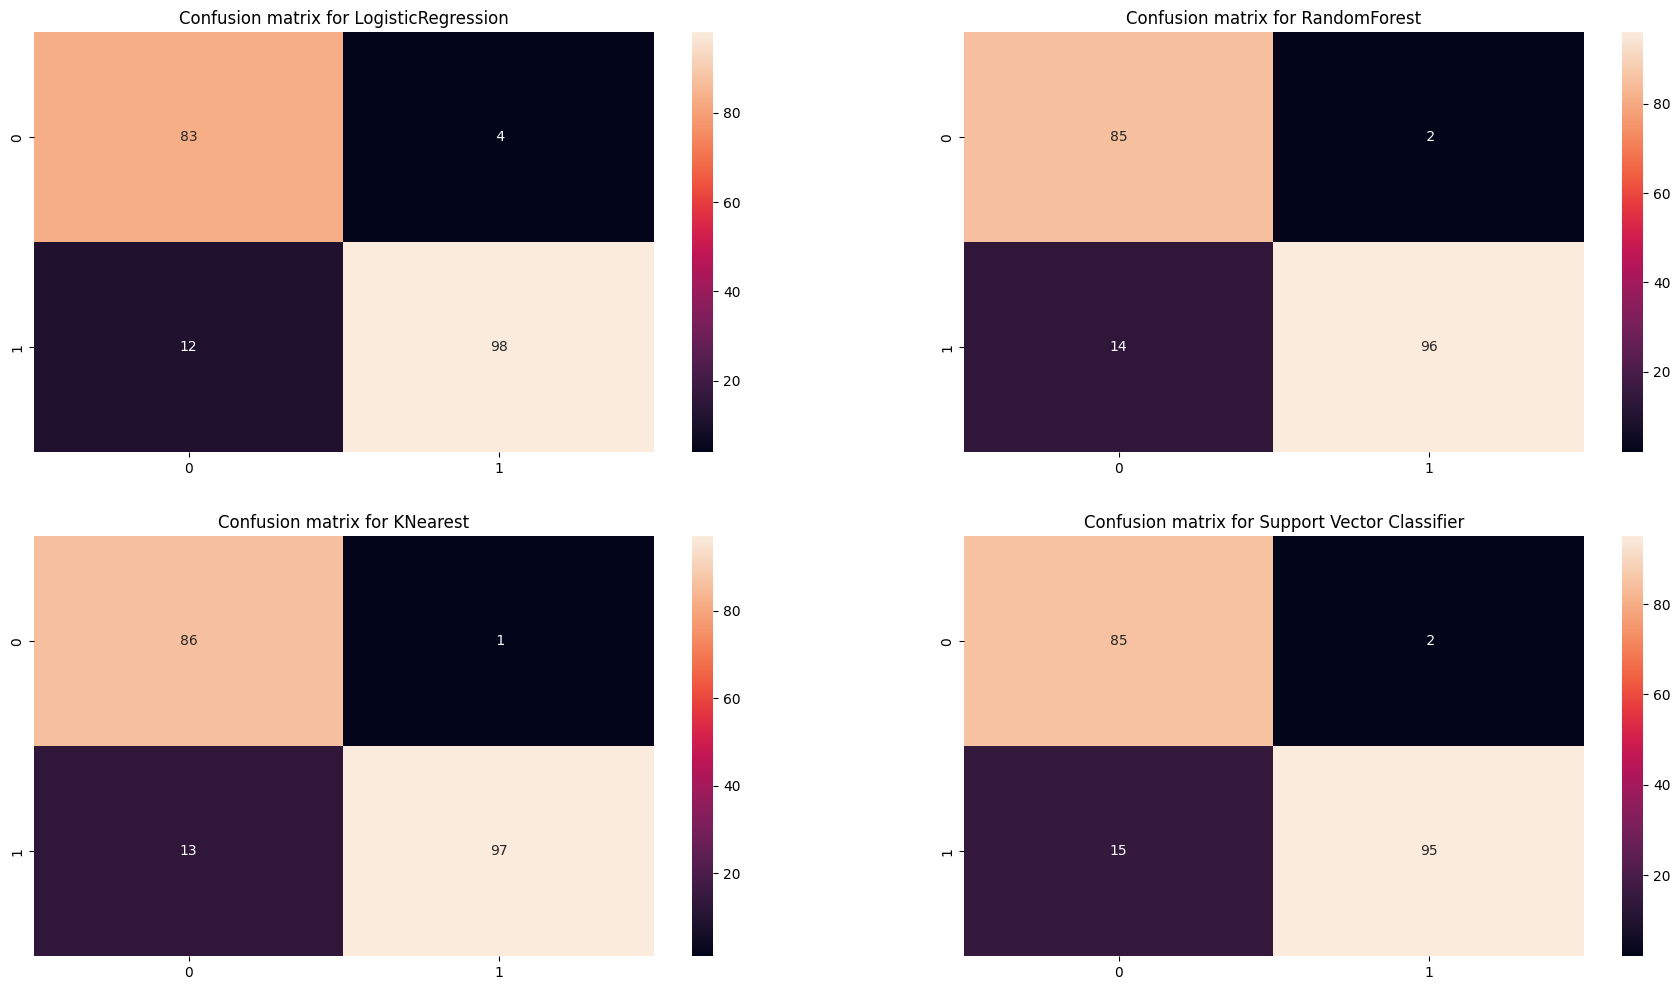

In [50]:
from sklearn.metrics import confusion_matrix

fig,ax = plt.subplots(2,2,figsize=(22,12))
n=0

for classifier in classifiers:
    Y_pred = classifiers[classifier].predict(X_test)
    i,j = divmod(n,2)
    sns.heatmap(confusion_matrix(Y_test,Y_pred),ax=ax[i][j],annot=True,fmt='2.0f')
    ax[i][j].set_title("Confusion matrix for {}".format(classifier))
    n+=1

**Hyperparameters optimization**

To find the best model, we will optimize the hyperparameters of each model.

We will use the GridSearchCV function to find the best hyperparameters for each model.

In [51]:
param_logistic = {
    'penalty':['l1','l2'],
    'C':np.logspace(0,4,10)
}

grid_logistic = sk.model_selection.GridSearchCV(LogisticRegression(),param_logistic,cv=5,verbose=True,n_jobs=-1)
print("Hyperparameter tuning for Logistic Regression")
grid_logistic.fit(X_train,Y_train)
log_reg = grid_logistic.best_estimator_

param_randomforest = {
    'n_estimators':[200,500],
    'max_features':['auto','log2'],
    'max_depth':[4,5,6,7,8,None],
    'criterion':['gini','entropy']
}

grid_randomforest = sk.model_selection.GridSearchCV(RandomForestClassifier(),param_randomforest,cv=5,verbose=True,n_jobs=-1)
print("Hyperparameter tuning for Random Forest")
grid_randomforest.fit(X_train,Y_train)
random_forest = grid_randomforest.best_estimator_

param_KNearest = {
    'n_neighbors':[3,5,11,19],
    'weights':['uniform','distance'],
    'metric':['euclidean','manhattan','minkowski']
}

grid_KNearest = sk.model_selection.GridSearchCV(KNeighborsClassifier(),param_KNearest,cv=5,verbose=True,n_jobs=-1)
print("Hyperparameter tuning for K Nearest Neighbors")
grid_KNearest.fit(X_train,Y_train)
KNearest = grid_KNearest.best_estimator_

param_SVM = {
    'C':[0.1,1,10,100],
    'gamma':[1,0.1,0.01,0.001],
    'kernel':['rbf','poly','sigmoid']
}

grid_SVM = sk.model_selection.GridSearchCV(SVC(),param_SVM,cv=5,verbose=True,n_jobs=-1)
print("Hyperparameter tuning for Support Vector Classifier")
grid_SVM.fit(X_train,Y_train)
SVM = grid_SVM.best_estimator_

Hyperparameter tuning for Logistic Regression
Fitting 5 folds for each of 20 candidates, totalling 100 fits


/home/sacha/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/sacha/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
 

Hyperparameter tuning for Random Forest
Fitting 5 folds for each of 48 candidates, totalling 240 fits


/home/sacha/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/sacha/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/sacha/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the defaul

Hyperparameter tuning for K Nearest Neighbors
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Hyperparameter tuning for Support Vector Classifier
Fitting 5 folds for each of 48 candidates, totalling 240 fits


Now that we have the best hyperparameters for each model, we can train our models.

We also want to plot the learning curve for each model.

The learning curve is crucial to select the best model, because it shows us if our model is overfitting or underfitting.

The lower the gap between the training score and the cross-validation score, the better our model is.

In [52]:
best_models = {
    "LogisticRegression": log_reg,
    "RandomForest": random_forest,
    "KNearest": KNearest,
    "Support Vector Classifier": SVM
}

for classifier in best_models:
    best_models[classifier].fit(X_train,Y_train)
    training_score = cross_val_score(best_models[classifier],X_train,Y_train,cv=5)
    print("Classifiers: ",classifier,"Has a training score of",round(training_score.mean(),2)*100,"% accuracy score")

Classifiers:  LogisticRegression Has a training score of 94.0 % accuracy score
Classifiers:  RandomForest Has a training score of 95.0 % accuracy score
Classifiers:  KNearest Has a training score of 94.0 % accuracy score
Classifiers:  Support Vector Classifier Has a training score of 95.0 % accuracy score


<module 'matplotlib.pyplot' from '/home/sacha/.local/lib/python3.8/site-packages/matplotlib/pyplot.py'>

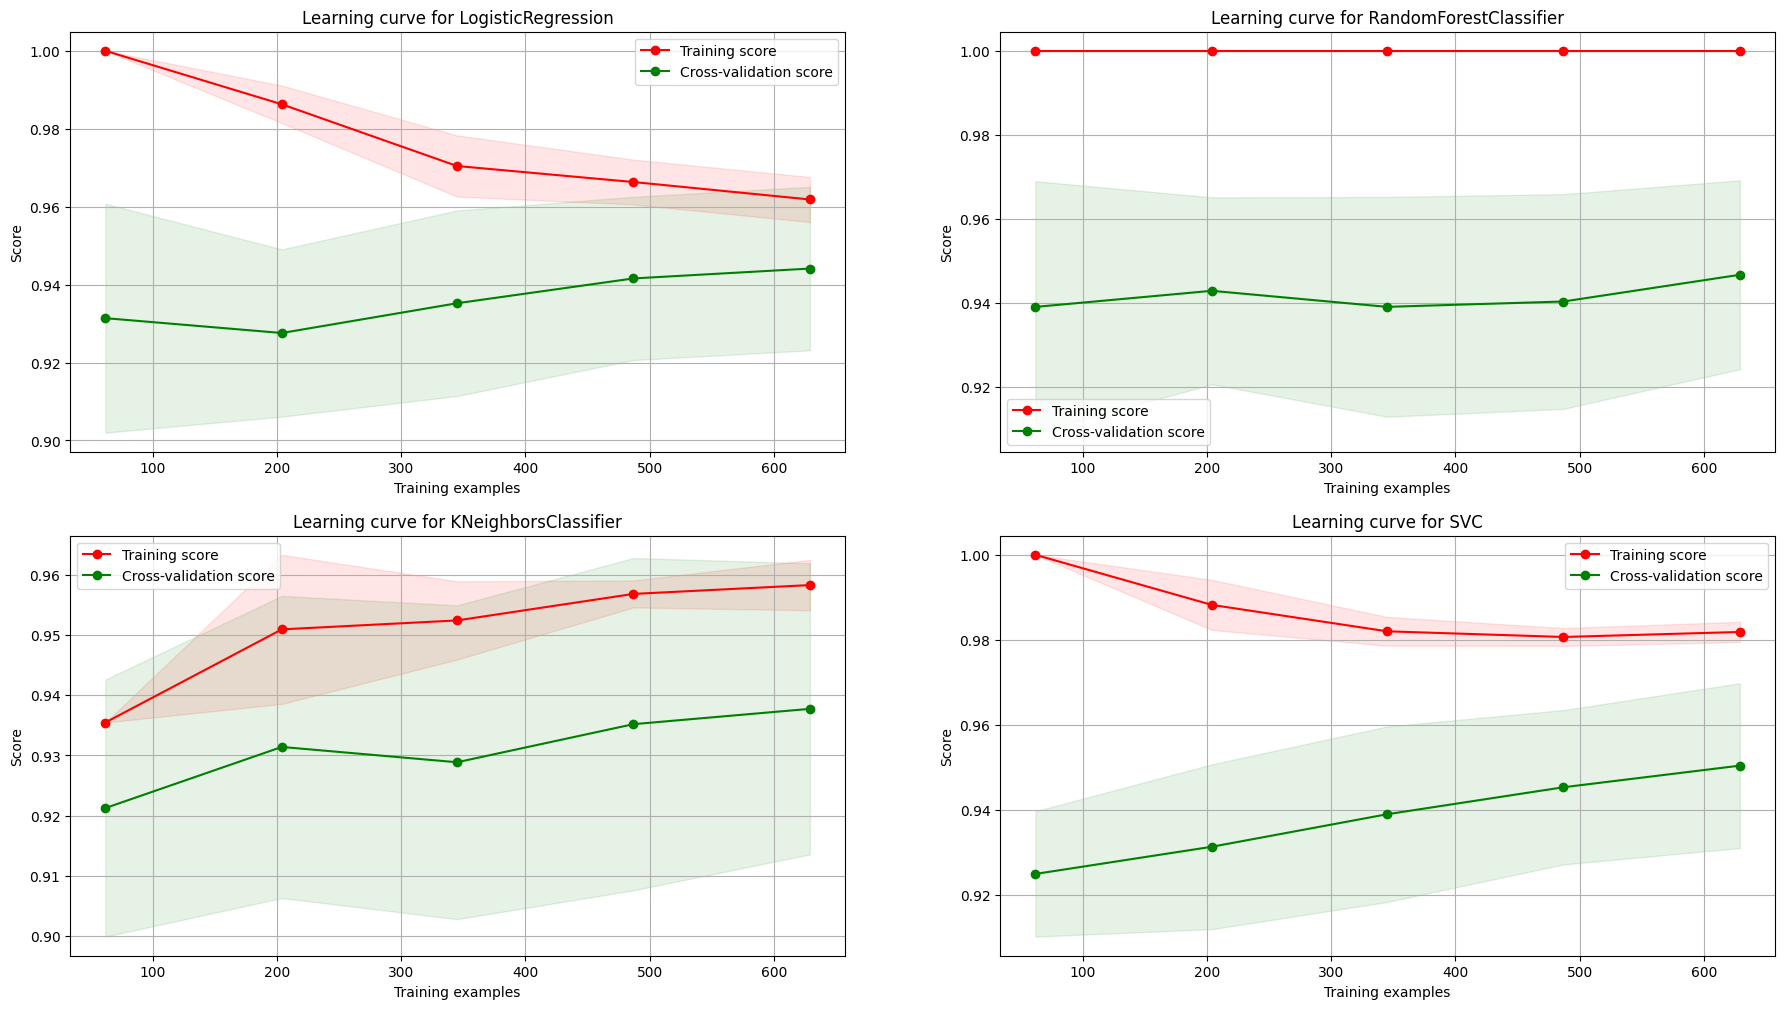

In [55]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator1,estimator2,estimator3,estimator4,X,Y,ylim=None,cv=None,n_jobs=-1,train_sizes=np.linspace(.1,1.0,5)):
    fig,ax = plt.subplots(2,2,figsize=(22,12))
    if ylim is not None:
        plt.ylim(*ylim)
    n=0
    for estimator in [estimator1,estimator2,estimator3,estimator4]:
        i,j = divmod(n,2)
        train_sizes,train_scores,test_scores = learning_curve(estimator,X,Y,cv=cv,n_jobs=n_jobs,train_sizes=train_sizes)
        train_scores_mean = np.mean(train_scores,axis=1)
        train_scores_std = np.std(train_scores,axis=1)
        test_scores_mean = np.mean(test_scores,axis=1)
        test_scores_std = np.std(test_scores,axis=1)
        ax[i][j].fill_between(train_sizes,train_scores_mean-train_scores_std,train_scores_mean+train_scores_std,alpha=0.1,color='r')
        ax[i][j].fill_between(train_sizes,test_scores_mean-test_scores_std,test_scores_mean+test_scores_std,alpha=0.1,color='g')
        ax[i][j].plot(train_sizes,train_scores_mean,'o-',color='r',label='Training score')
        ax[i][j].plot(train_sizes,test_scores_mean,'o-',color='g',label='Cross-validation score')
        ax[i][j].set_title("Learning curve for {}".format(estimator.__class__.__name__))
        ax[i][j].set_xlabel('Training examples')
        ax[i][j].set_ylabel('Score')
        ax[i][j].grid(True)
        ax[i][j].legend(loc='best')
        n+=1
    return plt

plot_learning_curve(log_reg,random_forest,KNearest,SVM,X_train,Y_train,cv=5)

The learning curve shows us that the Logistic Regression model is the best model. Indeed, the gap between the training score and the cross-validation score is the lowest.

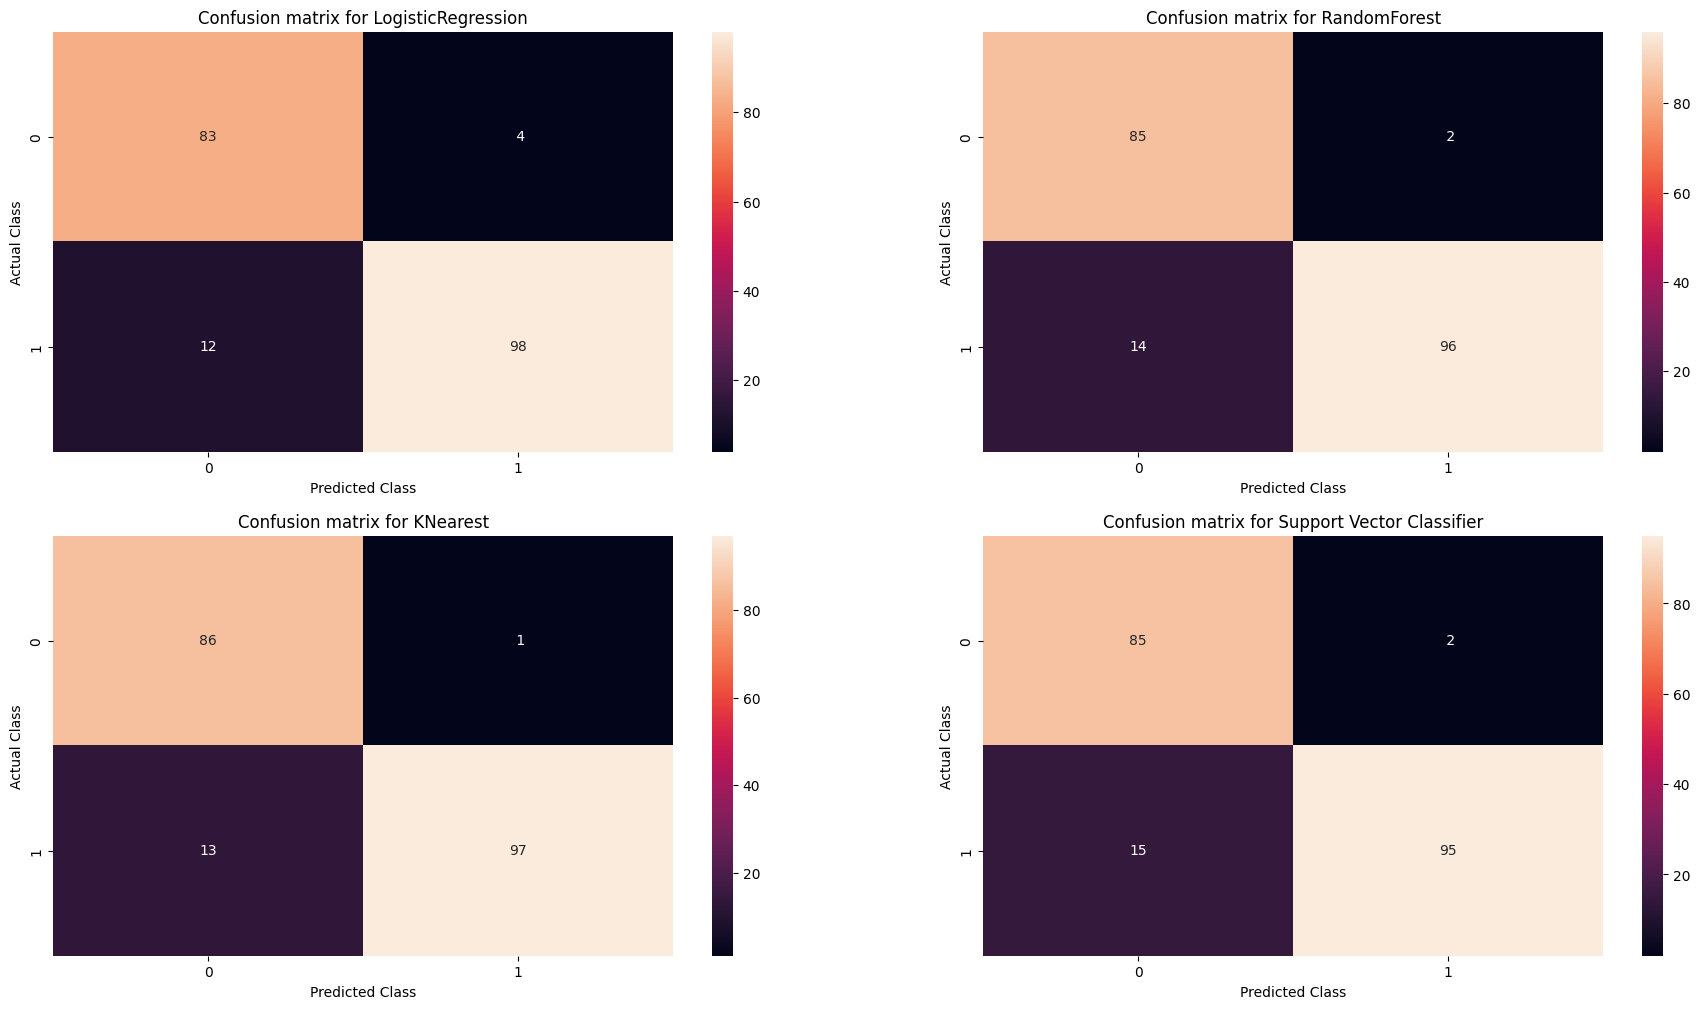

In [57]:
fig,ax = plt.subplots(2,2,figsize=(22,12))
n=0

for classifier in best_models:
    Y_pred = classifiers[classifier].predict(X_test)
    i,j = divmod(n,2)
    sns.heatmap(confusion_matrix(Y_test,Y_pred),ax=ax[i][j],annot=True,fmt='2.0f')
    ax[i][j].set_title("Confusion matrix for {}".format(classifier))
    ax[i][j].set_xlabel('Predicted Class')
    ax[i][j].set_ylabel('Actual Class')
    n+=1

Moreover, the confusion matrix shows us that the Logisitc Regression has the lowest number of False Negatives

We can check the accuracy of our model with the classification report.

The classification report shows different metrics such as:

* Precision: The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.

* Recall: The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

* F1-score: The F1-score is the harmonic mean of the precision and recall. A perfect model achieves an F1-score of 1.

In [58]:
from sklearn.metrics import classification_report

for classifier in best_models:
    Y_pred = classifiers[classifier].predict(X_test)
    print(classifier)
    print(classification_report(Y_test,Y_pred))

LogisticRegression
              precision    recall  f1-score   support

           0       0.87      0.95      0.91        87
           1       0.96      0.89      0.92       110

    accuracy                           0.92       197
   macro avg       0.92      0.92      0.92       197
weighted avg       0.92      0.92      0.92       197

RandomForest
              precision    recall  f1-score   support

           0       0.86      0.98      0.91        87
           1       0.98      0.87      0.92       110

    accuracy                           0.92       197
   macro avg       0.92      0.92      0.92       197
weighted avg       0.93      0.92      0.92       197

KNearest
              precision    recall  f1-score   support

           0       0.87      0.99      0.92        87
           1       0.99      0.88      0.93       110

    accuracy                           0.93       197
   macro avg       0.93      0.94      0.93       197
weighted avg       0.94      0.93

Finally to evaluate our model, we will use the ROC curve.

AttributeError: predict_proba is not available when  probability=False

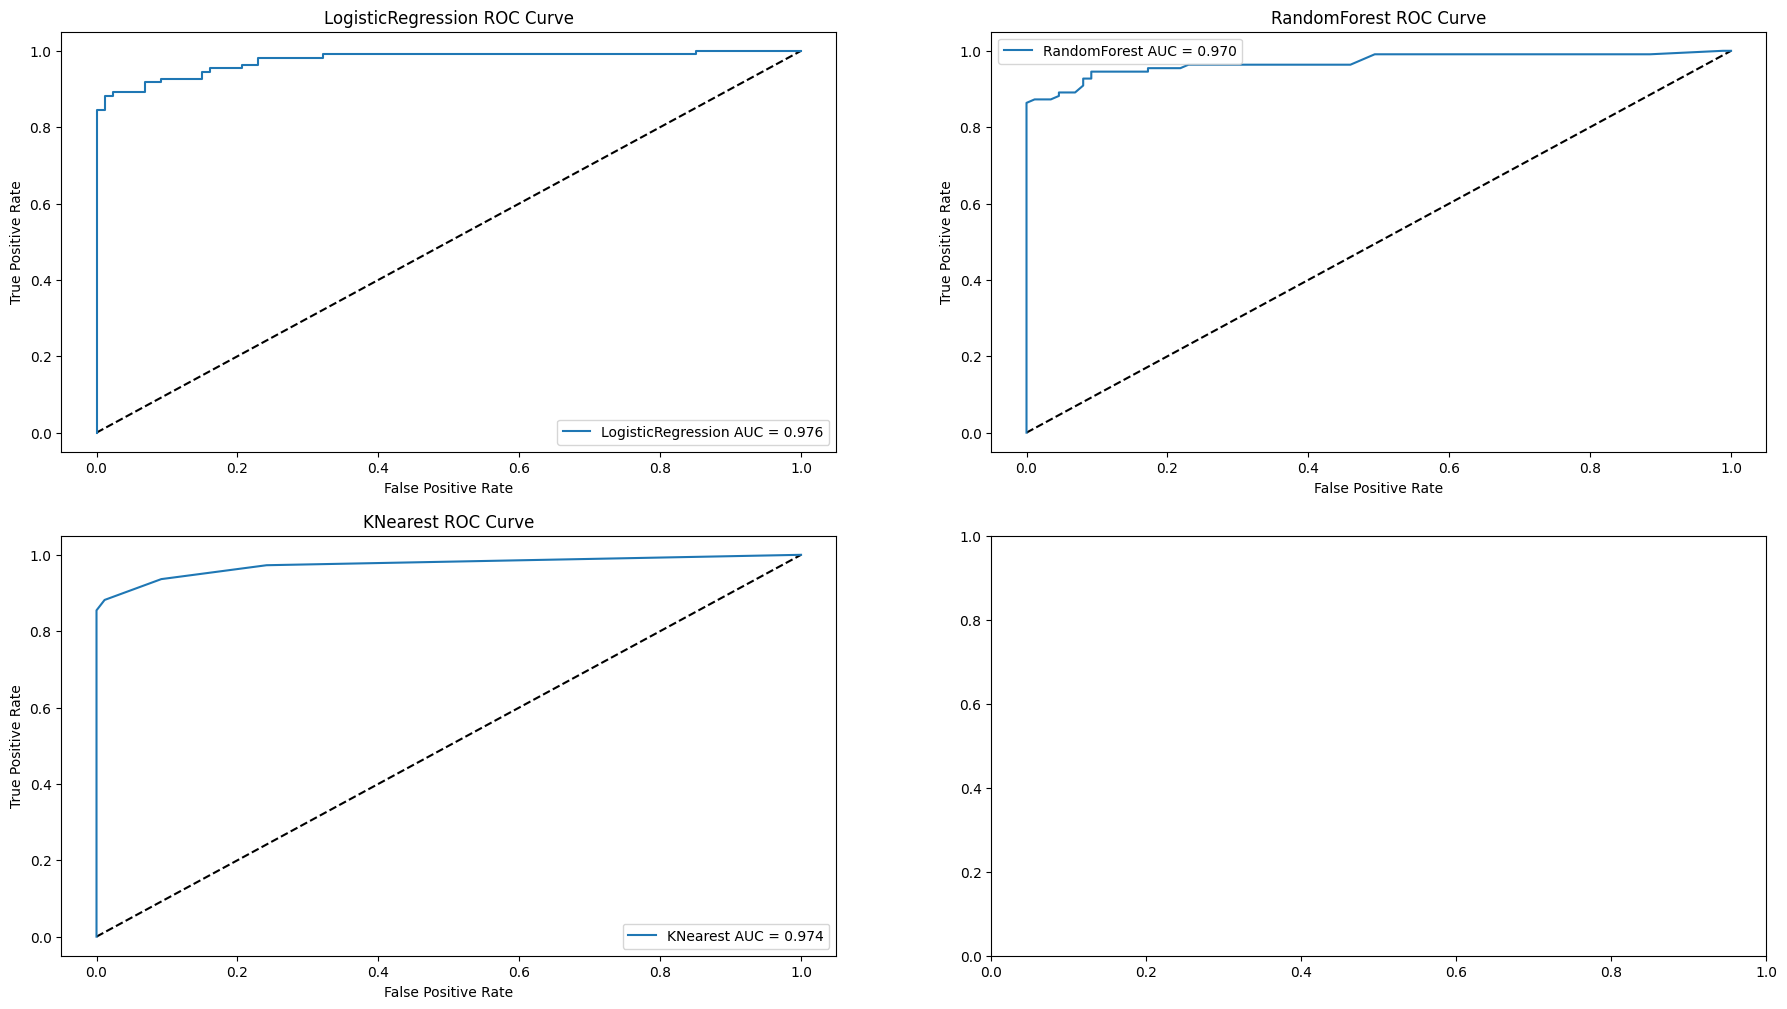

In [59]:
from sklearn.metrics import roc_curve

fig,ax = plt.subplots(2,2,figsize=(22,12))
n=0

for classifier in best_models:
    Y_pred = classifiers[classifier].predict_proba(X_test)[:,1]
    i,j = divmod(n,2)
    fpr, tpr, thresholds = roc_curve(Y_test,Y_pred)
    ax[i][j].plot([0,1],[0,1],'k--')
    ax[i][j].plot(fpr,tpr,label='{} AUC = {:.3f}'.format(classifier,sk.metrics.auc(fpr,tpr)))
    ax[i][j].set_xlabel('False Positive Rate')
    ax[i][j].set_ylabel('True Positive Rate')
    ax[i][j].set_title('{} ROC Curve'.format(classifier))
    ax[i][j].legend(loc='best')
    n+=1

The ROC curve shows us the performance of our model for different thresholds.

The AUC score is the area under the ROC curve. The higher the AUC score, the better our model is.

The AUC score of our model is 0.97. So our model is very good.

# Conclusion

The Logistic Regression model is the best model to solve this problem.

Improvements required for this project:

* Gather more data to train our model. Especially more fraudulent transactions.